# **STOCK PRICE PREDICTION**

## **Introduction**
The goal of this project is to predict which stock gives best profits withing a target time set by user. Initially the user selects 3 to 5 or might be any number of stocks, user has to provide the stock Ticker symbol. Then

## **Methodology:**

*   **STEP 1 - Data Collection** : Utilize the yfinance library to access historical stock price data for the user's selected stocks.
The data collected will include daily closing prices, which will be the primary focus of the time series analysis.
*   **STEP 2 - Exploratory Data Analysis** : Plot the time series data to visually assess trends, seasonality, and other patterns.
Generate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for each stock to identify potential autoregressive and moving average components.
*   **STEP 3 - Stationarity Check** : Stationarity is a key assumption for many time series analysis techniques. In this step, we check for stationarity in the time series data. This involves performing statistical tests such as the Augmented Dickey-Fuller (ADF) test to assess the presence of trends, seasonality, and other patterns that could affect the stability of the data over time. If the data is non-stationary, we apply transformations such as differencing to achieve stationarity.
*   **STEP 4 - Model Selection** :
*   **STEP 5 - Residual Diagnosis** :
*   **STEP 6 - Forecasting** :

In [11]:
# !pip install yfinance
# !pip install statsmodels
# ! pip install pmdarima
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime,date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
from pmdarima import auto_arima
import statsmodels.api as sm
warnings.filterwarnings("ignore")

Here, we consider all the stock data as non seasonal data.

# Ticker Symbols

1. Technology Sector
---
    Apple Inc.: AAPL
    Microsoft Corporation: MSFT
    Alphabet Inc. (Google): GOOGL
    Amazon.com, Inc.: AMZN
    Facebook, Inc. (now Meta Platforms, Inc.): FB (now META)
    NVIDIA Corporation: NVDA
    Tesla, Inc.: TSLA
    Intel Corporation: INTC
    Advanced Micro Devices, Inc.: AMD
    Oracle Corporation: ORCL
    Salesforce.com, inc.: CRM
    Zoom Video Communications, Inc.: ZM
---
2. Financial Sector
---
    JPMorgan Chase & Co.: JPM
    Goldman Sachs Group, Inc.: GS
    Visa Inc.: V
    Mastercard Incorporated: MA
    PayPal Holdings, Inc.: PYPL
    Bank of America Corp: BAC
    Citigroup Inc.: C
    Wells Fargo & Company: WFC
    American Express Company: AXP
    Morgan Stanley: MS
---
3. Healthcare Sector
---
    Johnson & Johnson: JNJ
    Pfizer Inc.: PFE
    Merck & Co., Inc.: MRK
    AbbVie Inc.: ABBV
    Amgen Inc.: AMGN
    Novartis AG: NVS
    Gilead Sciences, Inc.: GILD
    Bristol Myers Squibb Company: BMY
    Moderna, Inc.: MRNA
    Biogen Inc.: BIIB
---
4. Consumer Goods Sector
---
    The Coca-Cola Company: KO
    Procter & Gamble Co.: PG
    Nike, Inc.: NKE
    PepsiCo, Inc.: PEP
    Walmart Inc.: WMT
    Unilever PLC: UL
    Nestlé SA: NSRGY
    L'Oréal SA: LRLCY
    Diageo plc: DEO
    Mondelez International, Inc.: MDLZ
---
5. Energy Sector
---
    Exxon Mobil Corporation: XOM
    Chevron Corporation: CVX
    Schlumberger Limited: SLB
    ConocoPhillips: COP
    Halliburton Company: HAL
    BP p.l.c.: BP
    Royal Dutch Shell plc: RDS.A
    TotalEnergies SE: TTE
    Kinder Morgan, Inc.: KMI
    Phillips 66: PSX
---
6. Industrial Sector
---
    Boeing Company: BA
    Caterpillar Inc.: CAT
    3M Company: MMM
    Honeywell International Inc.: HON
    General Electric Company: GE
    Lockheed Martin Corporation: LMT
    Raytheon Technologies Corporation: RTX
    Deere & Company: DE
    FedEx Corporation: FDX
    Union Pacific Corporation: UNP
---
7. Utilities Sector
---
    NextEra Energy, Inc.: NEE
    Duke Energy Corporation: DUK
    Southern Company: SO
    Dominion Energy, Inc.: D
    Exelon Corporation: EXC
    American Electric Power Company, Inc.: AEP
    Pacific Gas & Electric Co.: PCG
    Consolidated Edison, Inc.: ED
    Public Service Enterprise Group Incorporated: PEG
    Edison International: EIX
---


## **Data Collection**

In [ ]:
# Fetch stock data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
today = date.today().strftime('%Y-%m-%d')  # Today's date as YYYY-MM-DD
stock_data = {ticker: yf.download(ticker, start='2020-01-01', end=today)['Close'] for ticker in tickers}


## STATIONARY CHECK

Using ADF test we can see if our time series is stationary or not. Since we are using stocks data, our output has to be a non stationary time series.

In [4]:
# Function to perform ADF test
def perform_adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'{key}: {value}')
    if result[1] > 0.05:
        print("The series is likely non-stationary.\n")
    else:
        print("The series is likely stationary.\n")

# Perform ADF test on each stock
for ticker, data in stock_data.items():
    print(f"Results for {ticker}:")
    perform_adf_test(data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Results for AAPL:
ADF Statistic: -1.9596557942838084
p-value: 0.30453781767068033
1%: -3.436470487817901
5%: -2.8642424166404
10%: -2.5682088634756735
The series is likely non-stationary.

Results for MSFT:
ADF Statistic: -0.46000168456083956
p-value: 0.8995884076814654
1%: -3.4365224825380714
5%: -2.86426535058257
10%: -2.568221078163292
The series is likely non-stationary.

Results for GOOGL:
ADF Statistic: -1.3666220704999936
p-value: 0.598169239058724
1%: -3.436470487817901
5%: -2.8642424166404
10%: -2.5682088634756735
The series is likely non-stationary.

Results for AMZN:
ADF Statistic: -1.7899412223423314
p-value: 0.3854669088569155
1%: -3.436470487817901
5%: -2.8642424166404
10%: -2.5682088634756735
The series is likely non-stationary.

Results for TSLA:
ADF Statistic: -2.494638229979314
p-value: 0.11678435782874663
1%: -3.4365224825380714
5%: -2.86426535058257
10%: -2.568221078163292
The series is likely non-stationary.



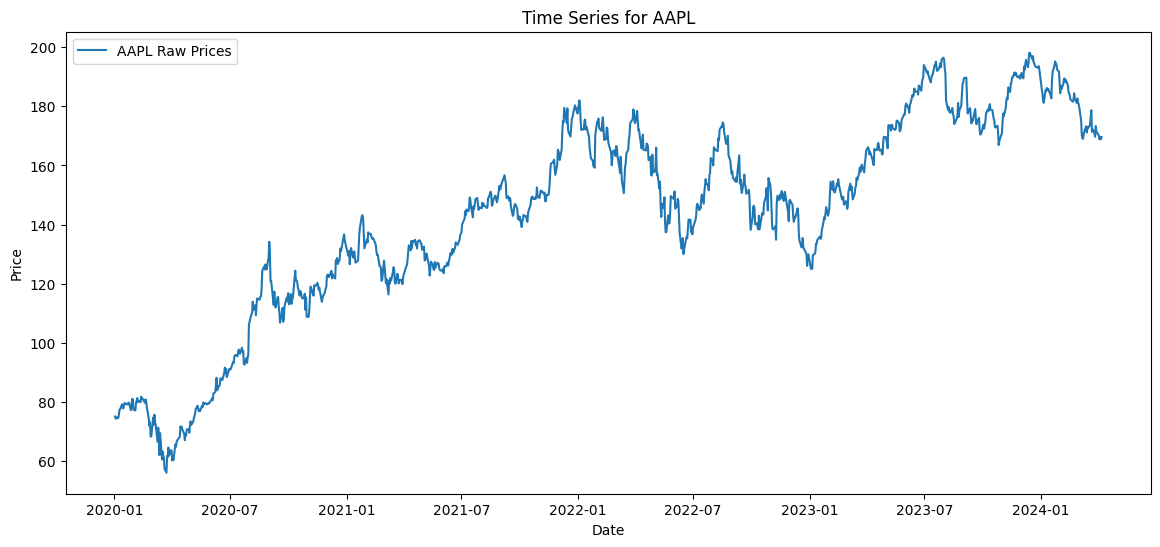

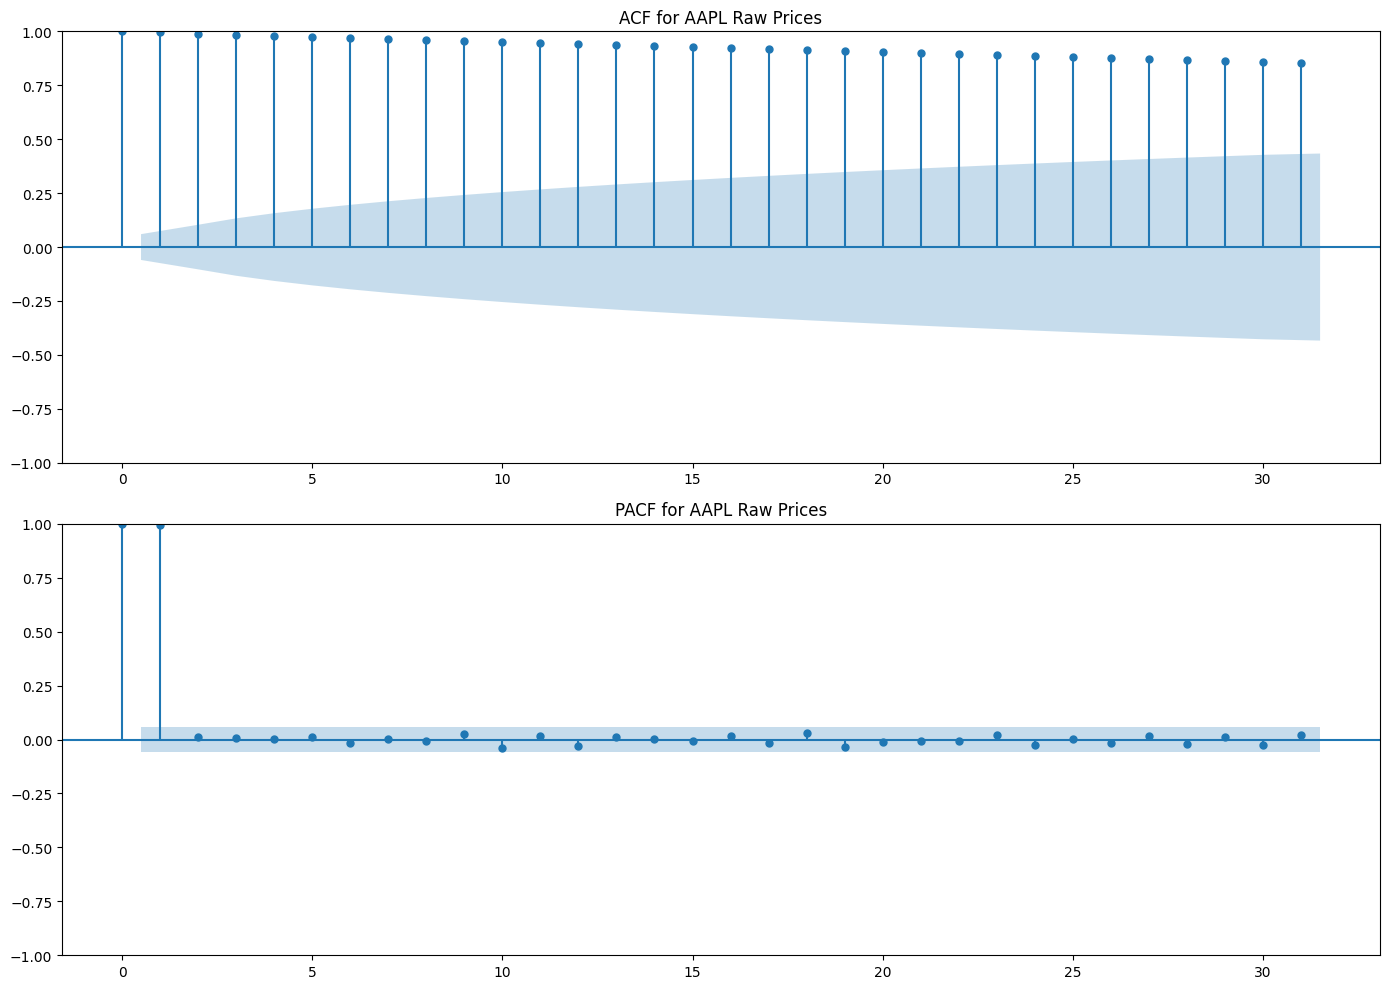

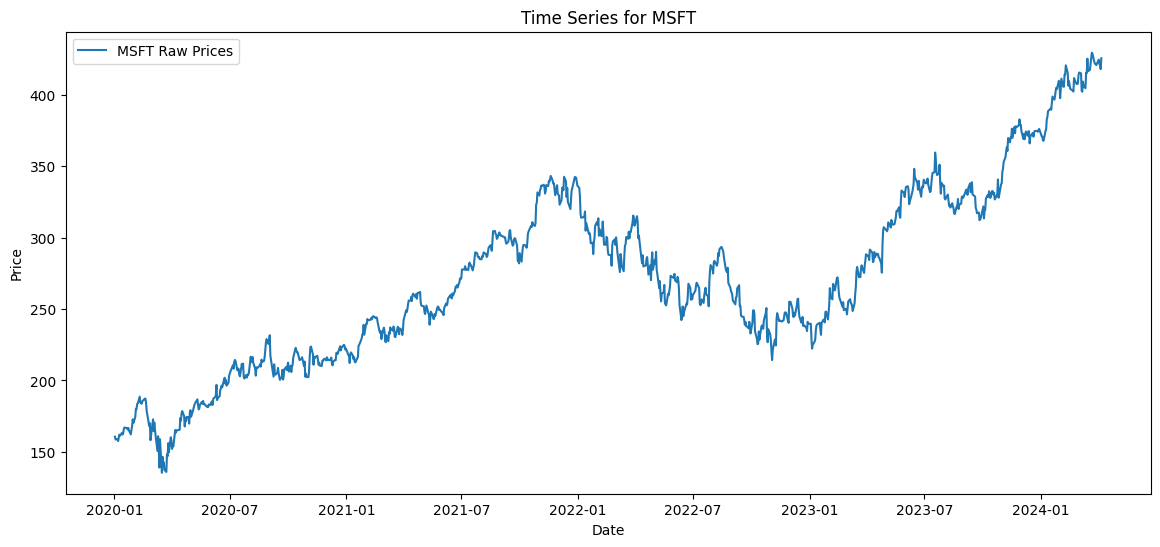

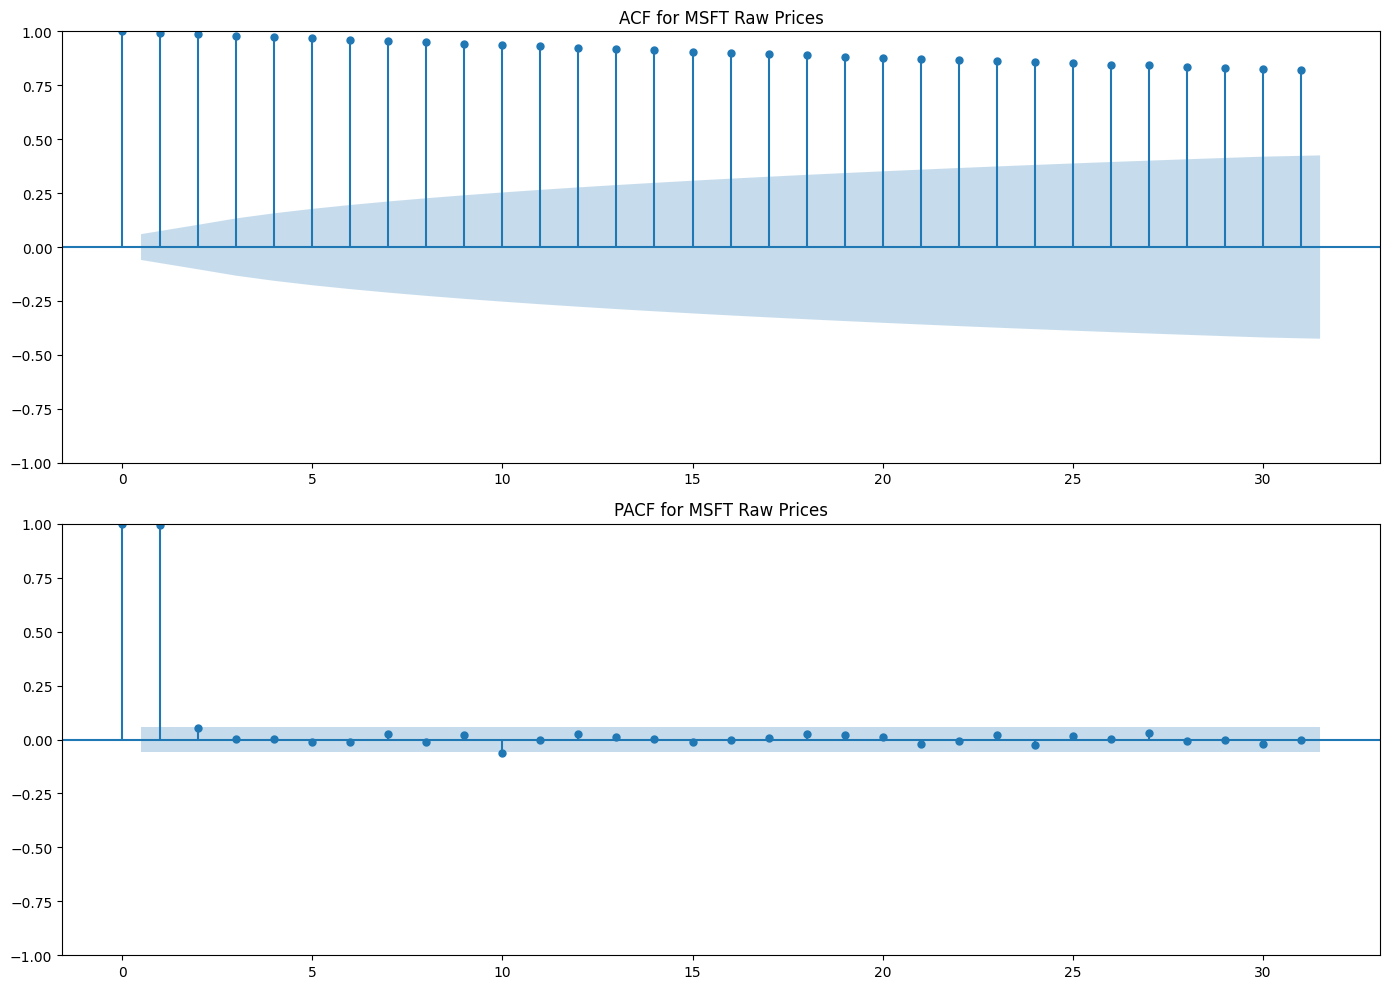

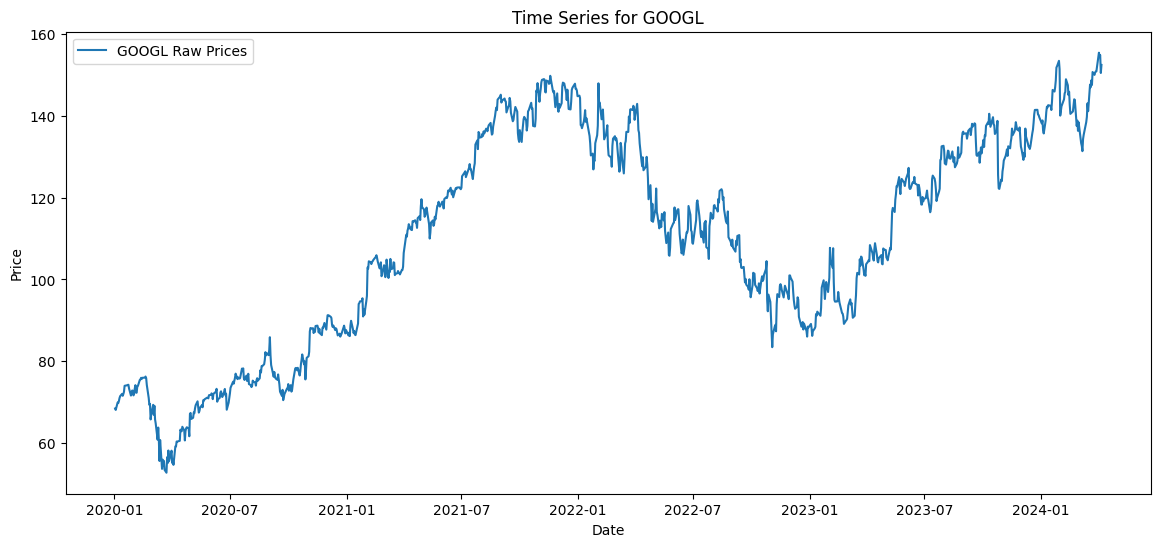

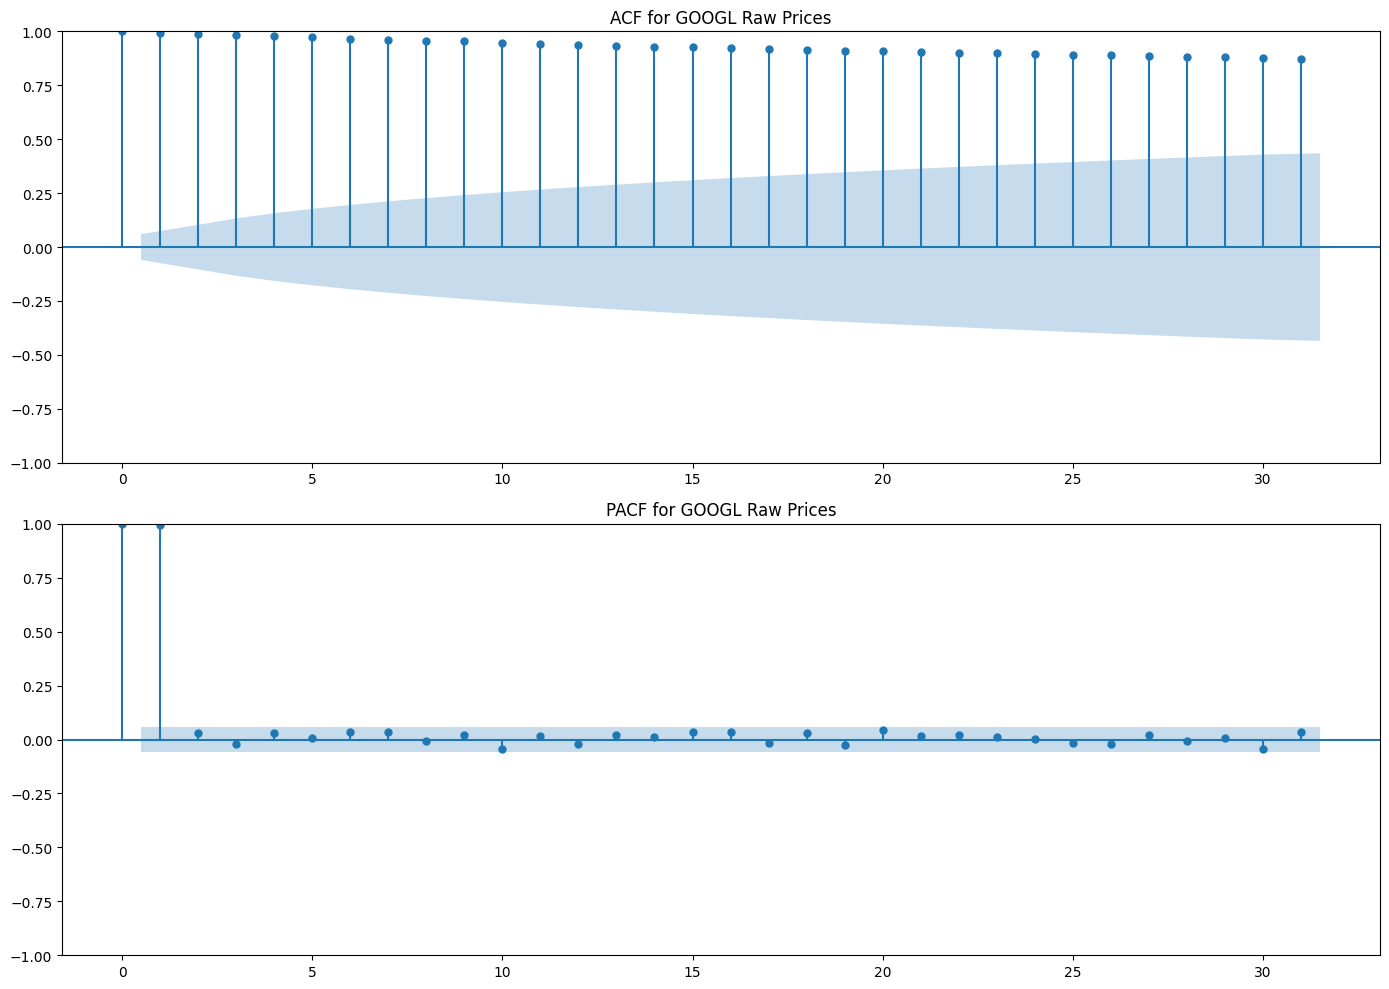

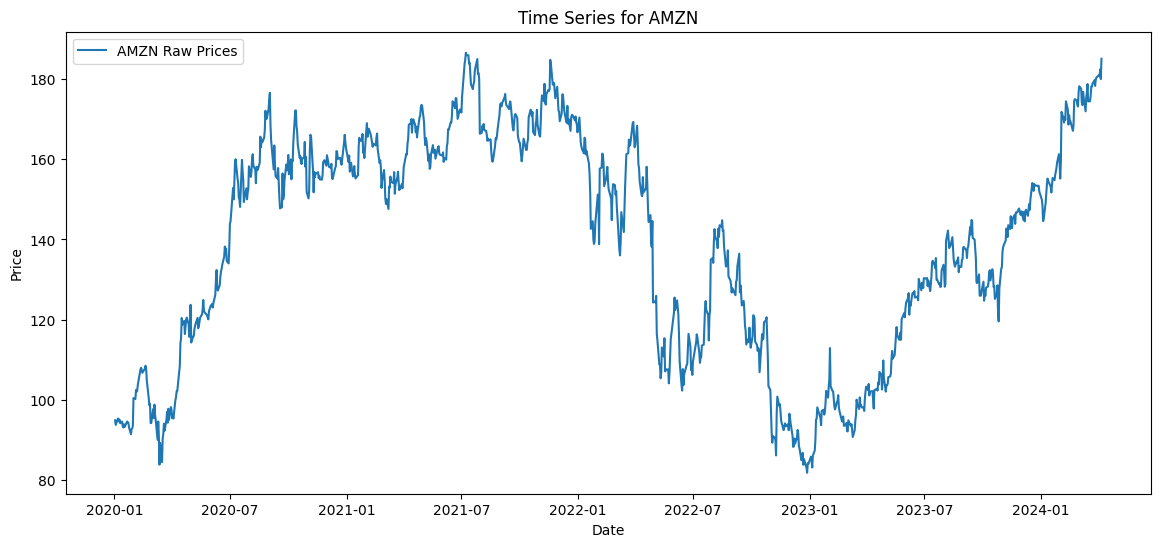

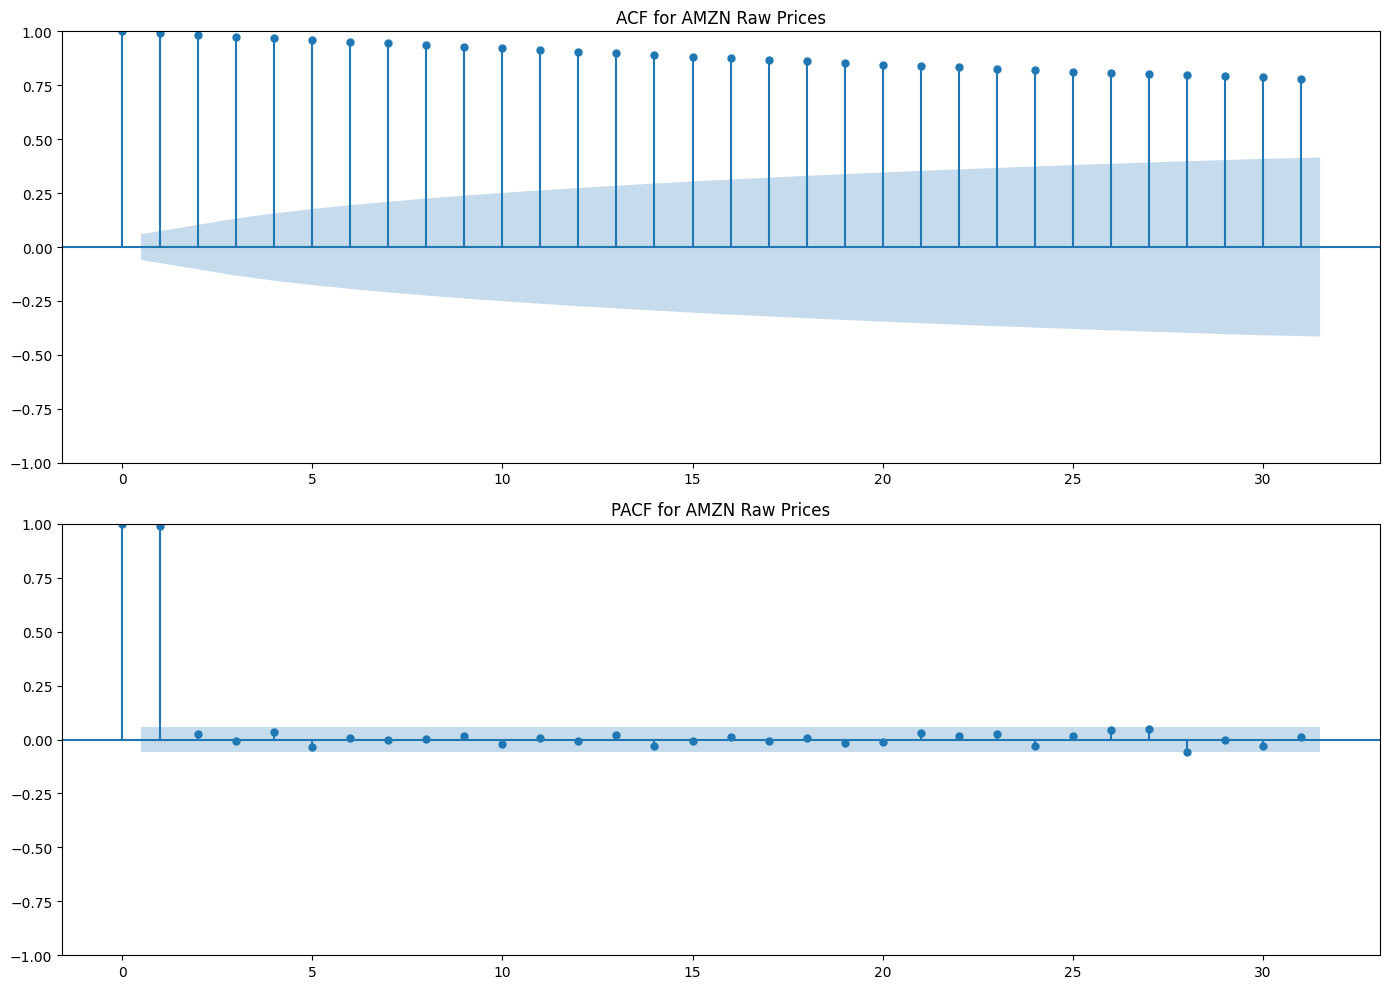

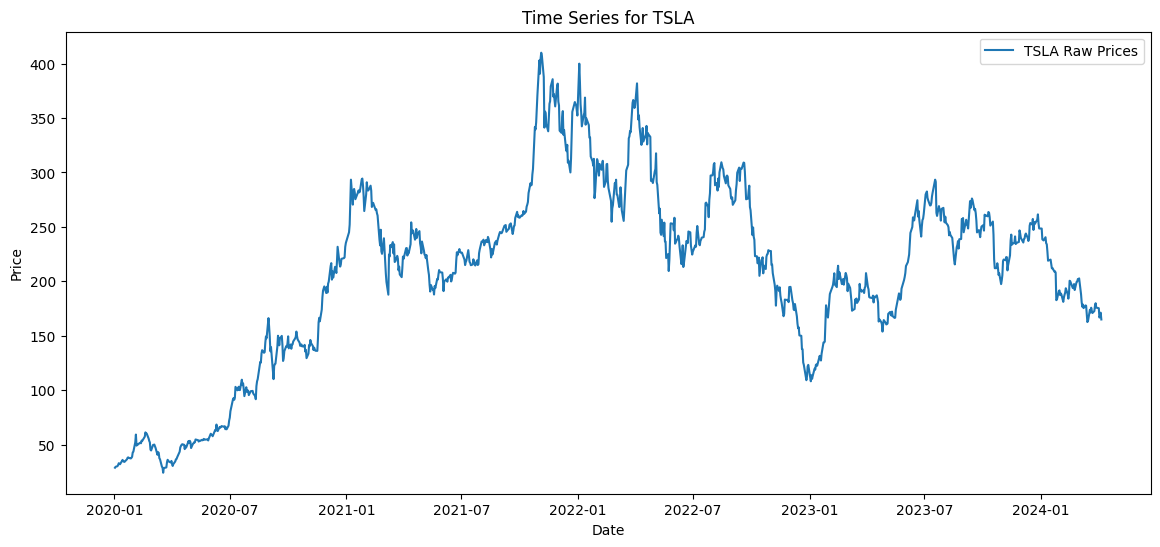

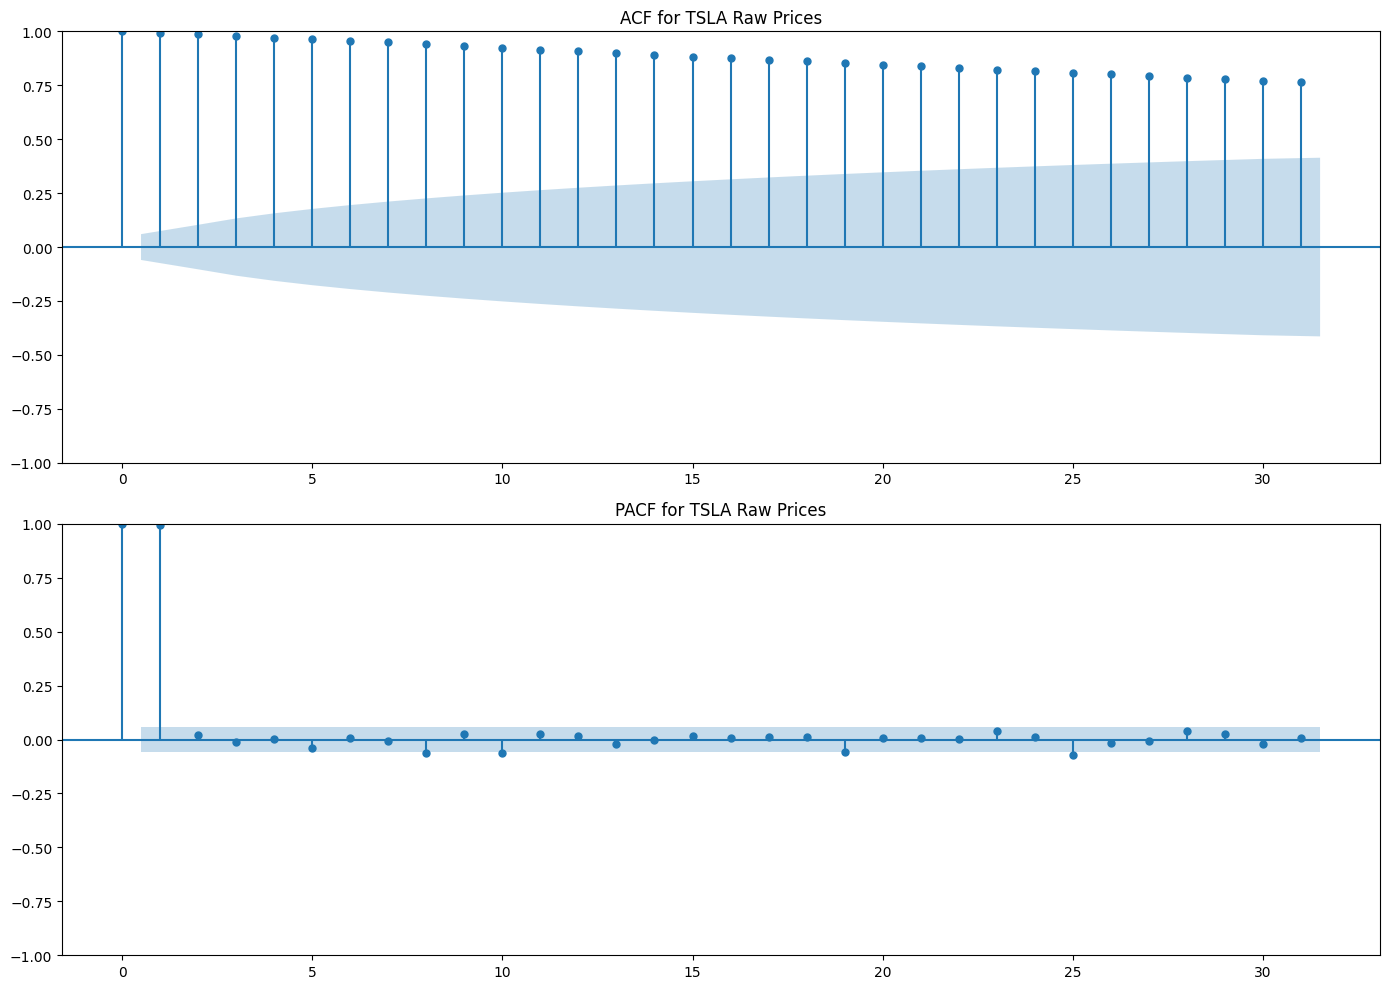

In [5]:
def plot_raw_prices_and_acf_pacf(time_series, ticker):
    # Plot the raw time series data
    plt.figure(figsize=(14, 6))
    plt.plot(time_series, label=f'{ticker} Raw Prices')
    plt.title(f'Time Series for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot ACF and PACF for raw prices
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    plot_acf(time_series, ax=ax[0])
    ax[0].set_title(f'ACF for {ticker} Raw Prices')
    plot_pacf(time_series, ax=ax[1])
    ax[1].set_title(f'PACF for {ticker} Raw Prices')
    plt.tight_layout()
    plt.show()

for ticker in ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']:
    plot_raw_prices_and_acf_pacf(stock_data[ticker], ticker)

### AAPL Time Series Analysis
- **Time Series Plot:** Exhibits an increasing trend with regular volatility.
- **ACF Plot:** Shows gradual decay in correlation, suggesting a non-stationary time series.
- **PACF Plot:** Indicates a possible AR(1) process with a significant spike at lag 1.

### MSFT Time Series Analysis
- **Time Series Plot:** Indicates a long-term upward trend with fluctuations.
- **ACF Plot:** The ACF plot decays gradually, pointing towards a non-stationary series.
- **PACF Plot:** Similar to AAPL, a spike at lag 1 suggests dependency on the immediate past value.

### GOOGL Time Series Analysis
- **Time Series Plot:** Shows a consistent upward trend with periods of decline.
- **ACF Plot:** Slow decay in the ACF plot suggests non-stationarity.
- **PACF Plot:** A significant first lag spike with little subsequent correlation, hinting at an AR(1) model fit.

### AMZN Time Series Analysis
- **Time Series Plot:** Displays significant fluctuations and some periods of a sharp increase or decrease. This type of pattern suggests a possible non-stationary process with varying volatility.
- **ACF Plot:** Exhibits a slow decrease in autocorrelation values with increasing lags, indicating potential non-stationarity.
- **PACF Plot:** Shows a sharp drop after the first lag, which may imply an autoregressive component of order one (AR(1)).

### TSLA Time Series Analysis
- **Time Series Plot:**Reveals a volatile stock price with multiple peaks and troughs, without a simple upward or downward trend, indicating market reactions to various stimuli.
- **ACF Plot:** Autocorrelation remains high over several lags, again suggesting a non-stationary time series.
- **PACF Plot:** After a strong initial lag, the partial autocorrelations remain within the confidence interval, which could be indicative of an AR(1) process.


## TRANSFORMATION:

Let's apply transformation on all our 5 stocks data and convert them into stationary TS.

In [6]:
log_returns = {}
for ticker in tickers:
    log_ret = np.log(stock_data[ticker]).diff().dropna()
    log_ret = log_ret.asfreq('B').fillna(0)
    log_returns[ticker] = log_ret

for ticker, data in log_returns.items():
    print(f"Results for {ticker} after Log Transformation and Differencing:")
    perform_adf_test(data)

Results for AAPL after Log Transformation and Differencing:
ADF Statistic: -10.497905463755355
p-value: 1.1032188746995552e-18
1%: -3.4362979108111977
5%: -2.8641662931725675
10%: -2.5681683203283256
The series is likely stationary.

Results for MSFT after Log Transformation and Differencing:
ADF Statistic: -9.079353752476438
p-value: 4.096054762283058e-15
1%: -3.436325084538422
5%: -2.8641782797532214
10%: -2.5681747043025274
The series is likely stationary.

Results for GOOGL after Log Transformation and Differencing:
ADF Statistic: -10.701700771385257
p-value: 3.509878915381186e-19
1%: -3.4362979108111977
5%: -2.8641662931725675
10%: -2.5681683203283256
The series is likely stationary.

Results for AMZN after Log Transformation and Differencing:
ADF Statistic: -34.82579360894244
p-value: 0.0
1%: -3.4362549432361504
5%: -2.8641473395601595
10%: -2.568158225793361
The series is likely stationary.

Results for TSLA after Log Transformation and Differencing:
ADF Statistic: -33.779640300

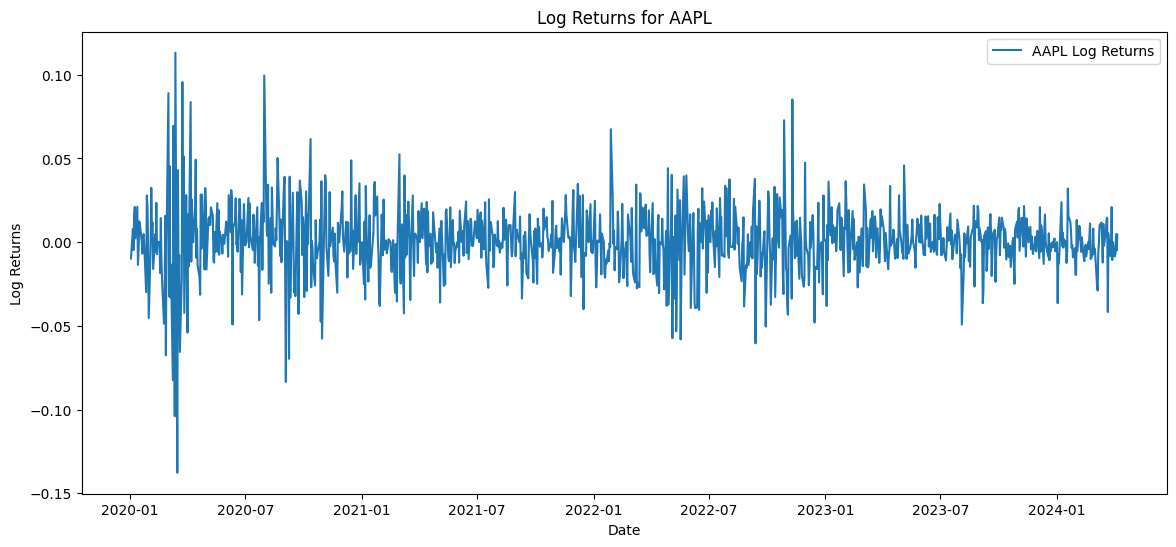

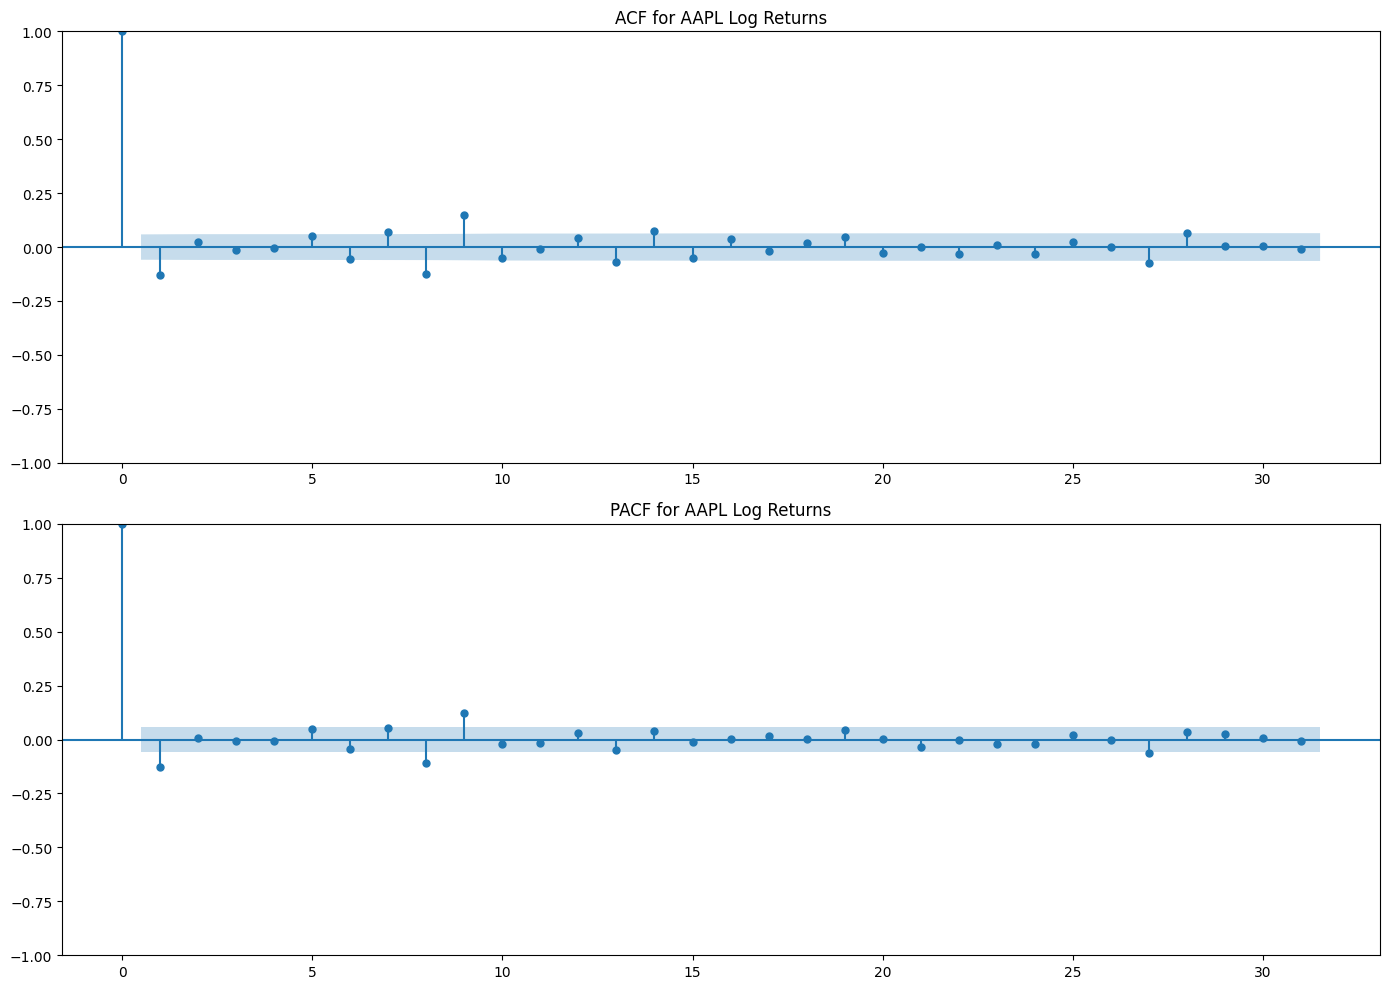

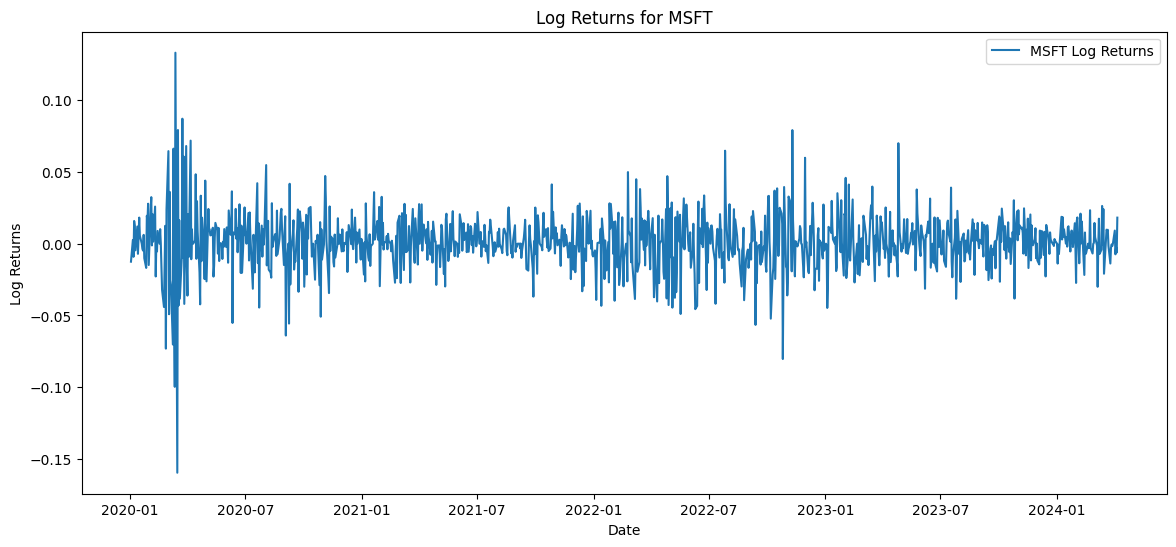

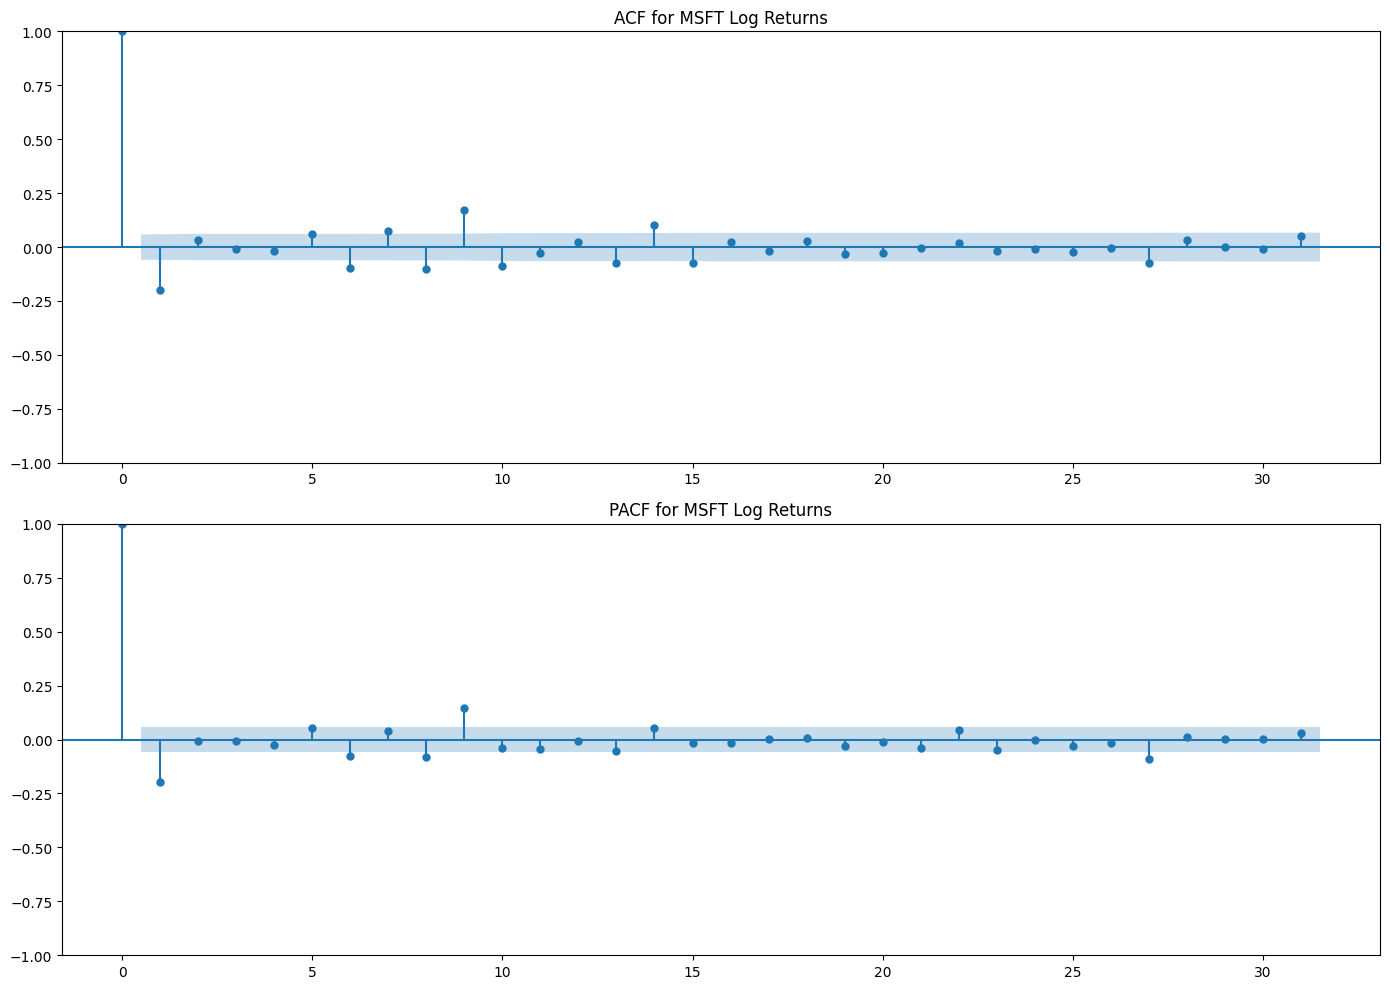

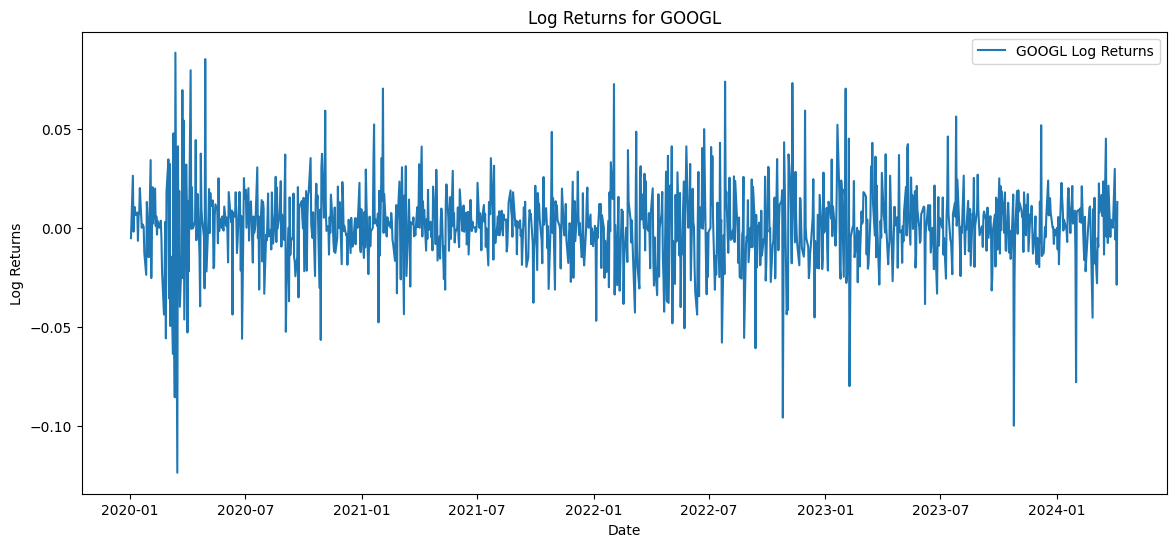

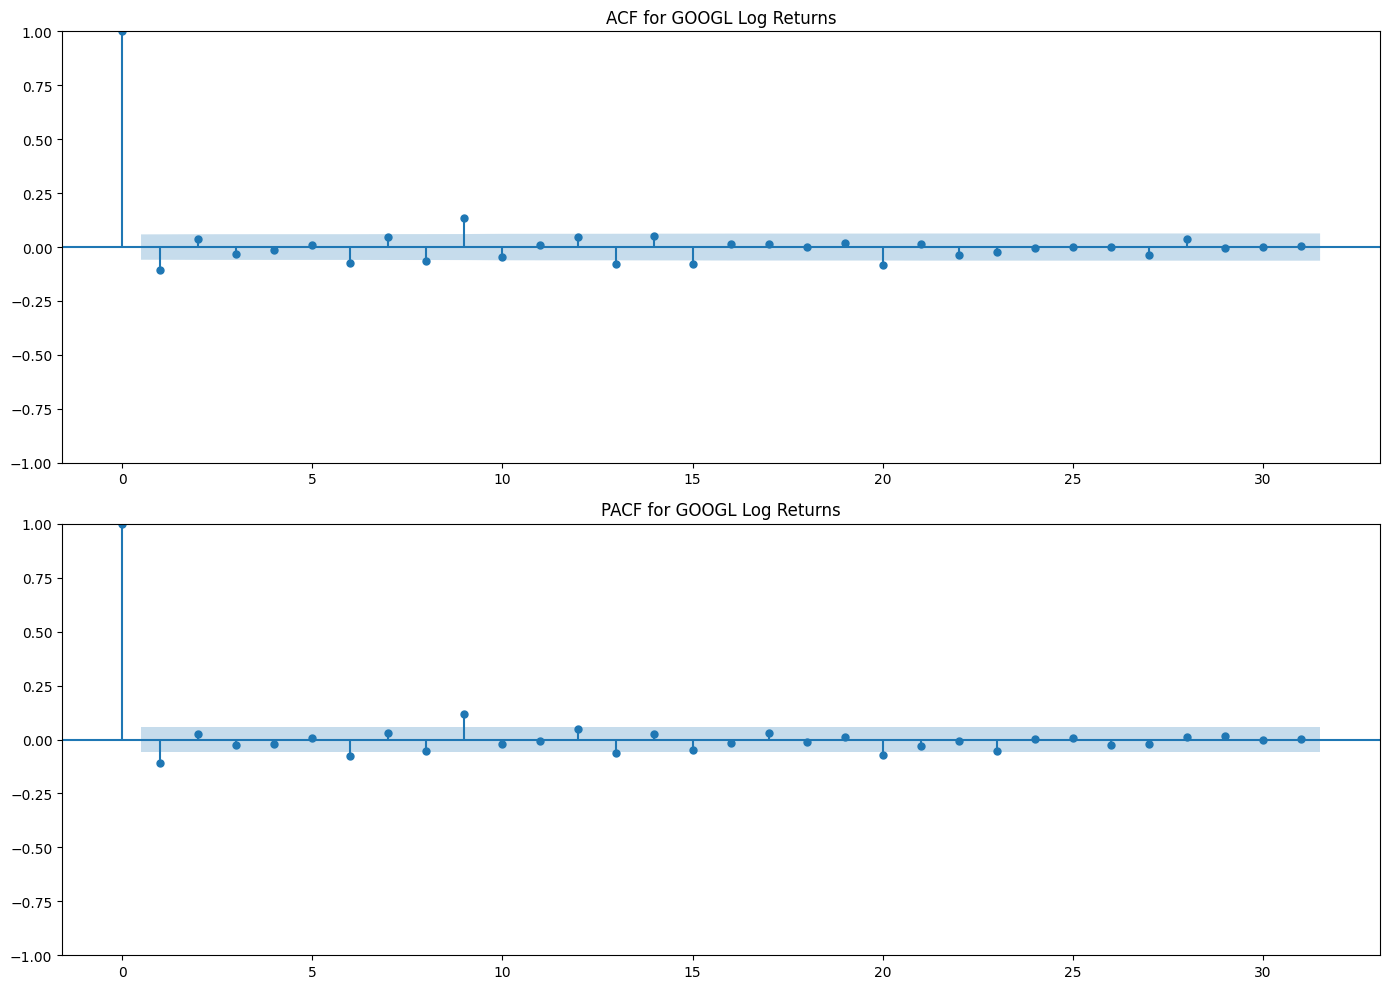

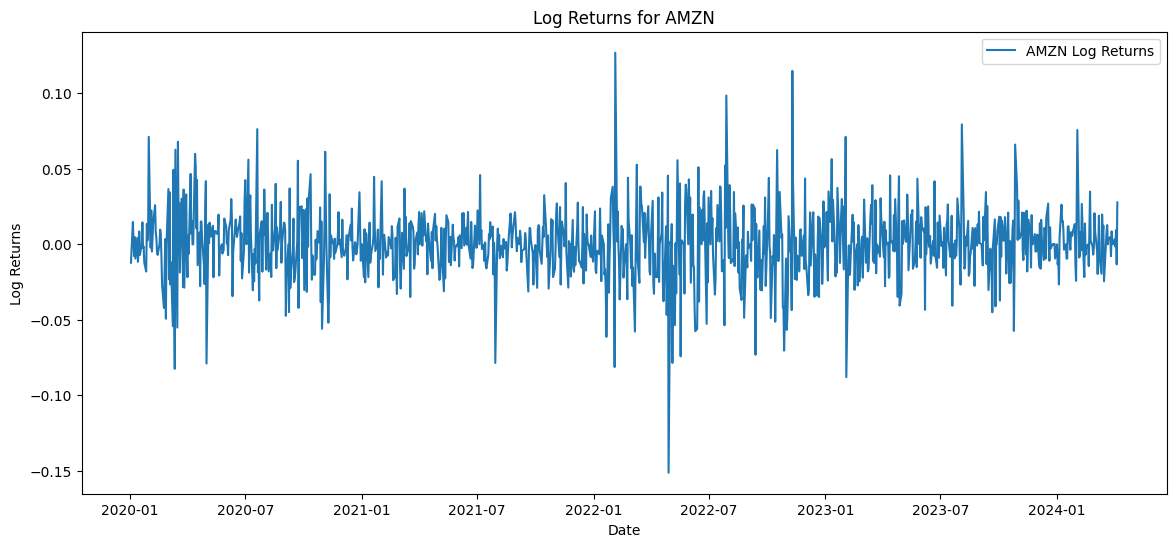

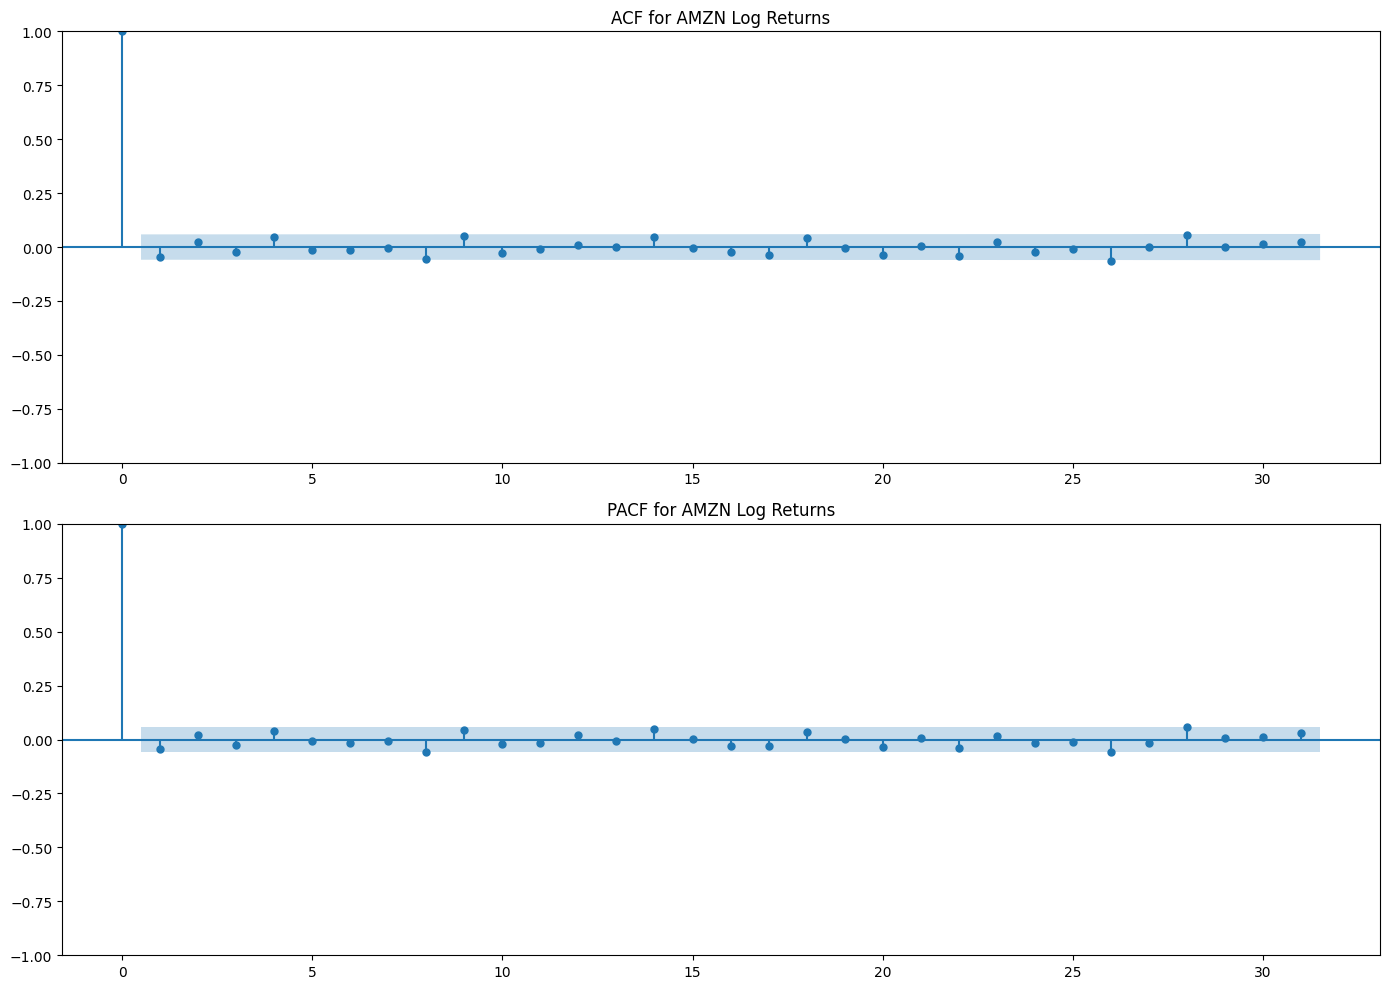

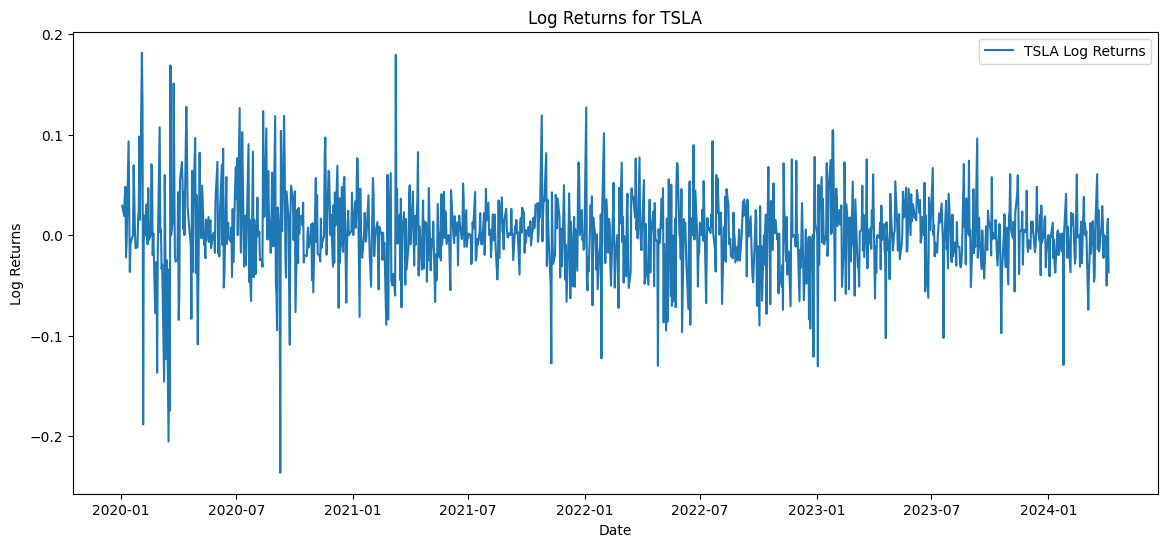

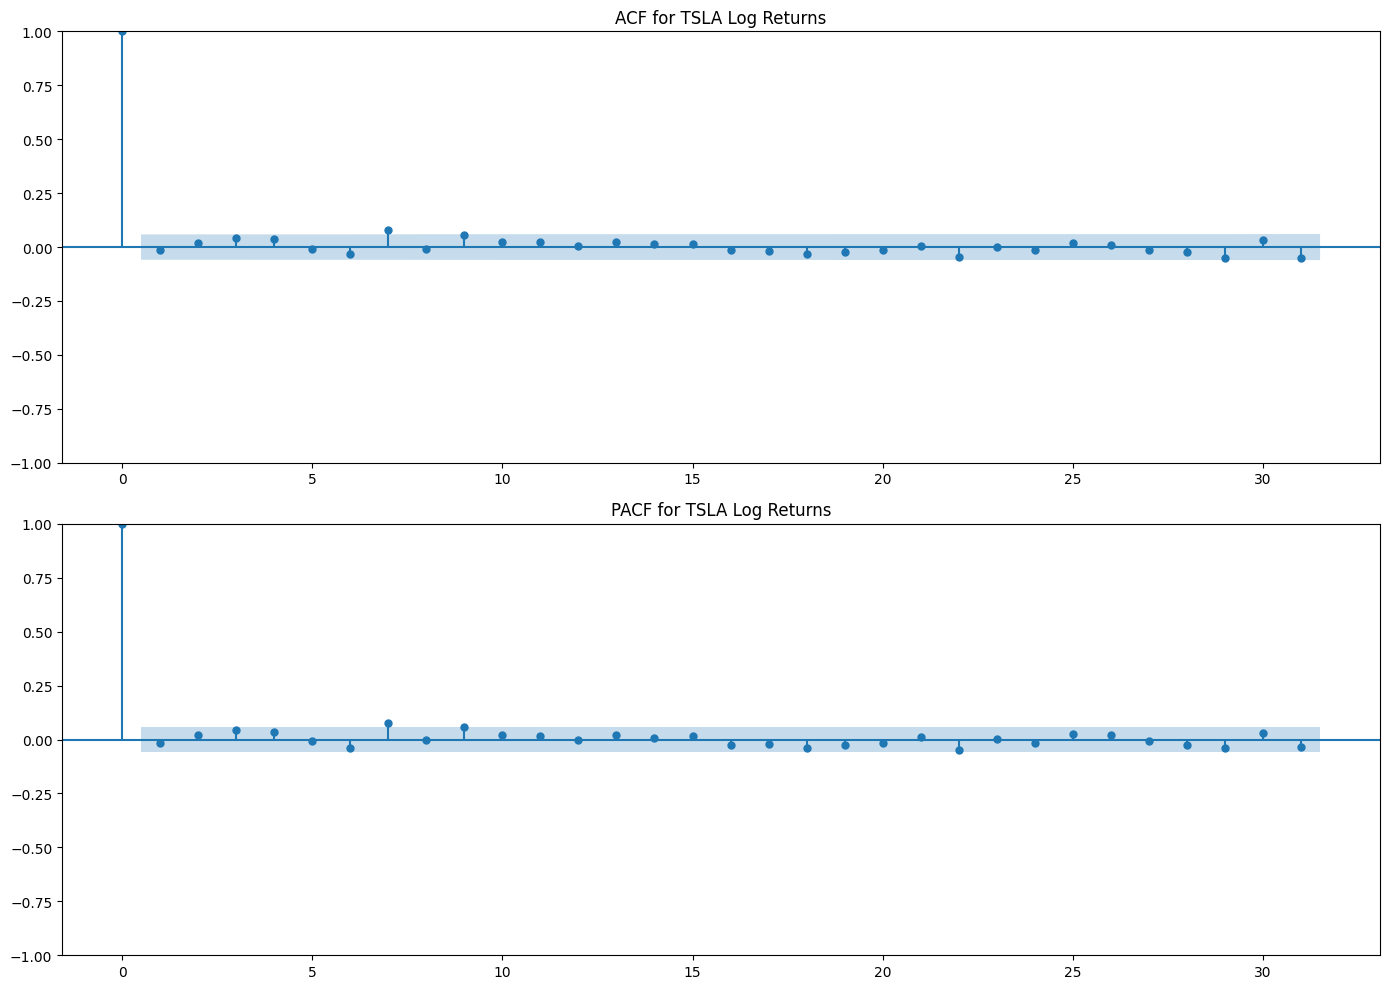

In [7]:
def plot_logged_returns_and_acf_pacf(log_time_series, ticker):
    # Plot the log returns time series data
    plt.figure(figsize=(14, 6))
    plt.plot(log_time_series, label=f'{ticker} Log Returns')
    plt.title(f'Log Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Log Returns')
    plt.legend()
    plt.show()

    # Plot ACF and PACF for log returns
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    plot_acf(log_time_series, ax=ax[0])
    ax[0].set_title(f'ACF for {ticker} Log Returns')
    plot_pacf(log_time_series, ax=ax[1])
    ax[1].set_title(f'PACF for {ticker} Log Returns')
    plt.tight_layout()
    plt.show()

for ticker in ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']:
    plot_logged_returns_and_acf_pacf(log_returns[ticker], ticker)

## MODEL SELECTION:

Lets see which model best fits our time series, and we will evaluate all the models with all of our time series and each stock data will be trained and tested on the best model individually.

Enter the number of days to forecast: 50

Forecasting for AAPL...
Model used for AAPL: ETS


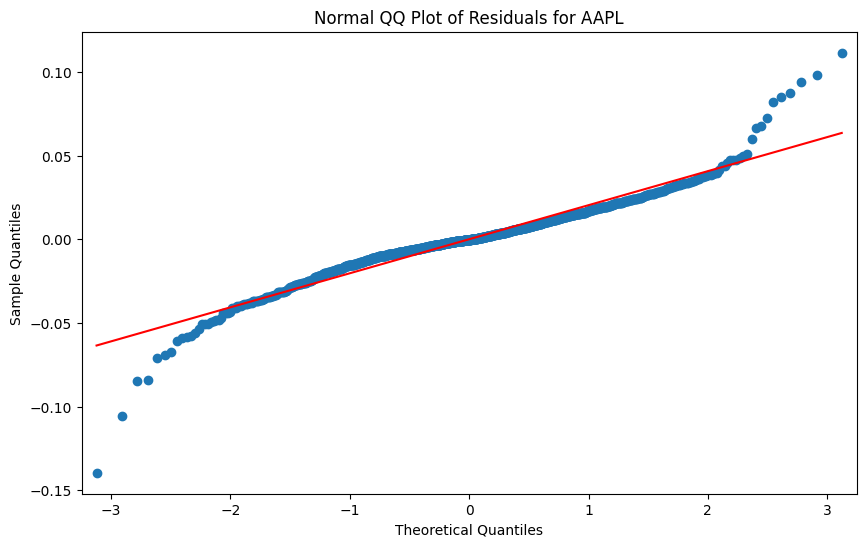


Forecasting for MSFT...
Model used for MSFT: ETS


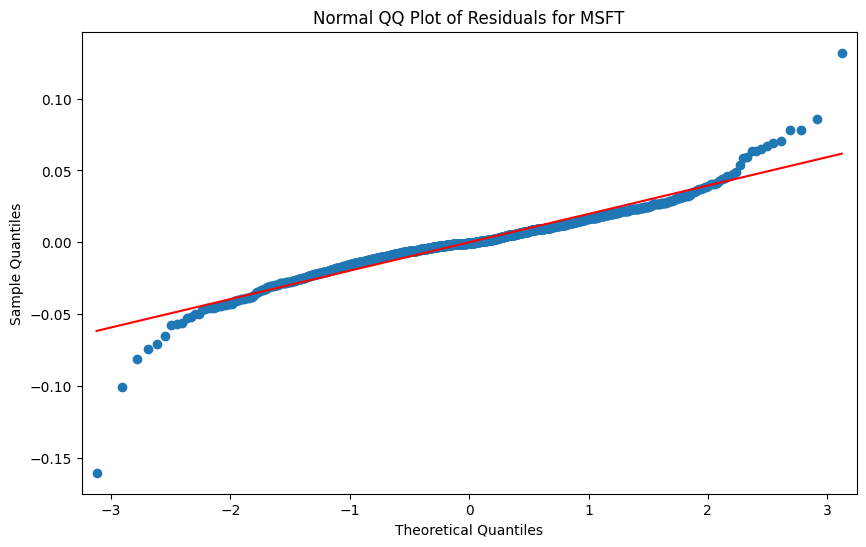


Forecasting for GOOGL...
Model used for GOOGL: ETS


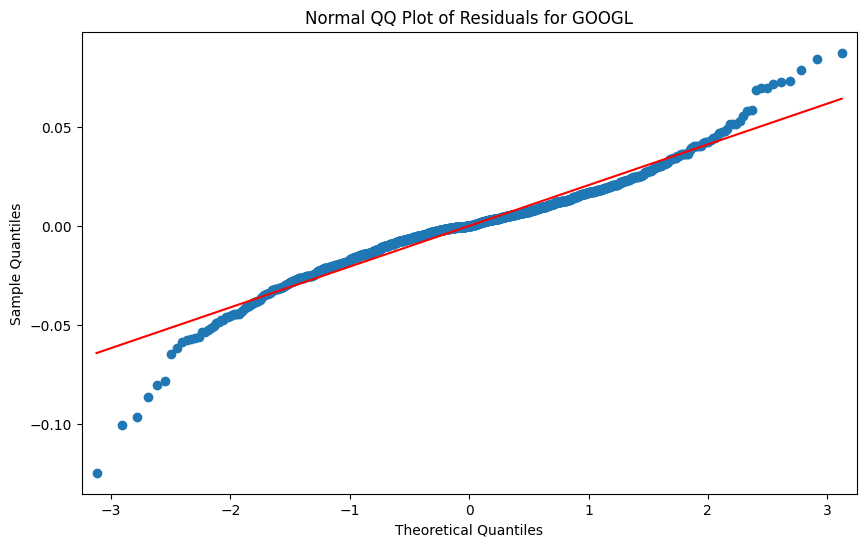


Forecasting for AMZN...
Model used for AMZN: ETS


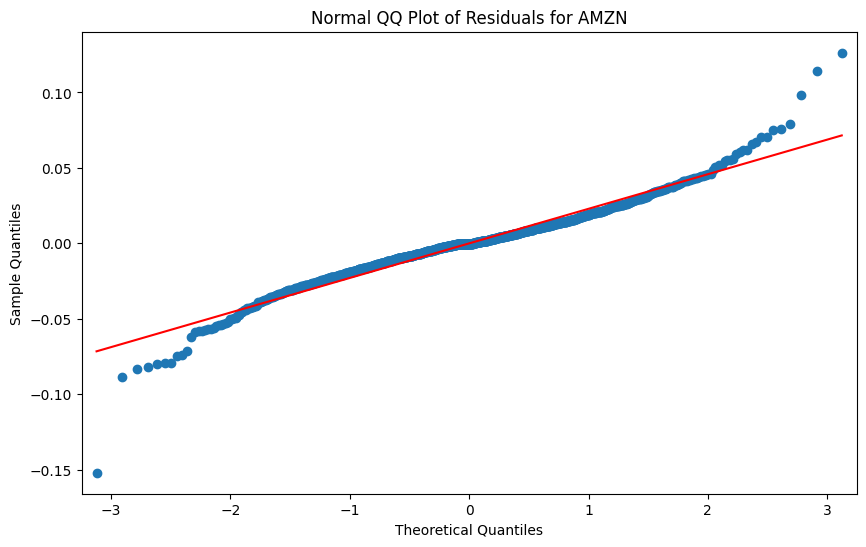


Forecasting for TSLA...
Model used for TSLA: ETS


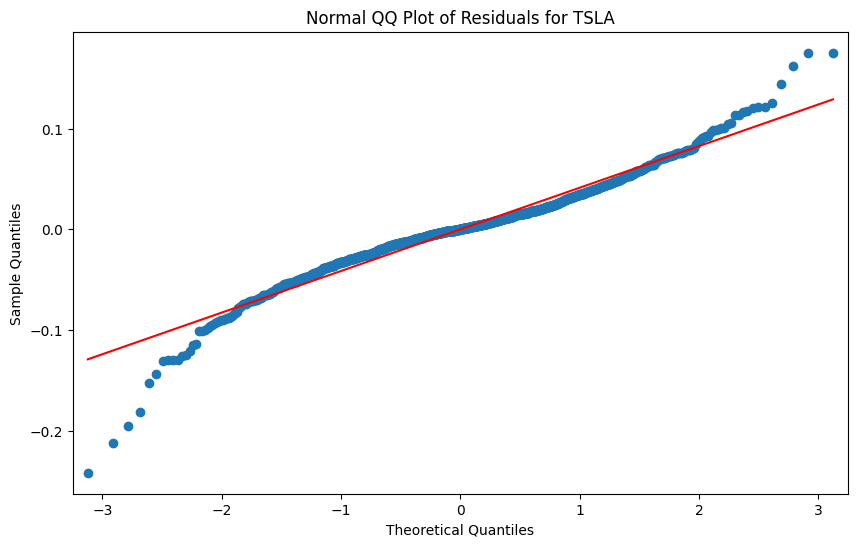


The stock expected to give the highest profit over the next 50 days from 2024-04-08 is MSFT with an expected return of 4.02%.


In [12]:
def find_best_arima_model(log_returns, p_range, d_range, q_range):
    best_aic = np.inf
    best_order = None
    best_model_fit = None
    for order in itertools.product(p_range, d_range, q_range):
        try:
            model = ARIMA(log_returns, order=order)
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = order
                best_model_fit = model_fit
        except:
            continue
    return best_order, best_model_fit

def find_best_auto_arima_model(log_returns):
    auto_model = auto_arima(log_returns, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore', maxiter=100)
    return auto_model

def find_best_ets_model(log_returns):
    best_aic = np.inf
    best_model_fit = None
    for trend in ['add', 'mul']:
        try:
            model = ExponentialSmoothing(log_returns, trend=trend, seasonal=None, initialization_method="estimated")
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_model_fit = model_fit
        except:
            continue
    return best_model_fit

def compare_models_and_forecast(log_returns, n_days):
    best_arima_order, best_arima_model_fit = find_best_arima_model(log_returns, range(3), range(2), range(3))
    auto_arima_model = find_best_auto_arima_model(log_returns)
    best_ets_model_fit = find_best_ets_model(log_returns)

    models_aic = {
        'ARIMA': best_arima_model_fit.aic if best_arima_model_fit else np.inf,
        'Auto ARIMA': auto_arima_model.aic() if auto_arima_model else np.inf,
        'ETS': best_ets_model_fit.aic if best_ets_model_fit else np.inf
    }

    best_model_name = min(models_aic, key=models_aic.get)
    forecast = None
    residuals = None

    if best_model_name == 'ARIMA':
        forecast = best_arima_model_fit.forecast(steps=n_days)
        residuals = best_arima_model_fit.resid
    elif best_model_name == 'Auto ARIMA':
        forecast = auto_arima_model.predict(n_periods=n_days)
        residuals = auto_arima_model.arima_res_.resid
    elif best_model_name == 'ETS':
        forecast = best_ets_model_fit.forecast(steps=n_days)
        residuals = best_ets_model_fit.resid

    return forecast, best_model_name, residuals

def plot_residuals_qqplot(residuals, title):
    fig = plt.figure(figsize=(10, 6))
    sm.qqplot(residuals, line='s', ax=plt.gca())
    plt.title(title)
    plt.show()

# Main workflow
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

forecast_days = int(input("Enter the number of days to forecast: "))
forecasts = {}
cumulative_returns = {}

for ticker in tickers:
    print(f"\nForecasting for {ticker}...")
    forecast, model_name, residuals = compare_models_and_forecast(log_returns[ticker], forecast_days)
    if forecast is not None:
        forecasts[ticker] = forecast
        cumulative_returns[ticker] = np.exp(np.sum(forecast)) - 1
        print(f"Model used for {ticker}: {model_name}")
        plot_residuals_qqplot(residuals, f'Normal QQ Plot of Residuals for {ticker}')
    else:
        print(f"Skipping {ticker} due to model fitting issues.")

if forecasts:
    best_stock = max(cumulative_returns, key=cumulative_returns.get)
    best_return = cumulative_returns[best_stock]
    today = datetime.today().strftime('%Y-%m-%d')
    print(f"\nThe stock expected to give the highest profit over the next {forecast_days} days from {today} is {best_stock} with an expected return of {best_return:.2%}.")
else:
    print("No forecasts available.")

warnings.resetwarnings()

## FORECASTING